In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### This script compares the expression of IFN+ only upreglated genes on bat and mouse 3-states cells (bat-mouse 1:1 orthologs only)
### results are plotted using seaborn.boxplot()

In [3]:
# Load R.aegyptiacus IFN- vs CTRL DE data
bat_pic_ctrl_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_pairs\bat_CD16_PIC_CD16_CTRL_DE.csv")
# Load R.aegyptiacus IFN+ vs CTRL DE data
bat_ifn_ctrl_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_pairs\bat_MAFB_CD16_CTRL_DE.csv")
# Load R.aegyptiacus IFN+ vs IFN- DE data
bat_ifn_pic_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_pairs\bat_MAFB_CD16_PIC_DE.csv")


In [4]:
# Load mouse IFN- vs CTRL DE data
mouse_pic_ctrl_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\mouse\blood\DE\cd16_mafb_de\mouse-pairs\mouse_CD16_PIC_CD16_CTRL_DE.csv")
# Load mouse IFN+ vs CTRL DE data
mouse_ifn_ctrl_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\mouse\blood\DE\cd16_mafb_de\mouse-pairs\mouse_MAFB_CD16_CTRL_DE.csv")
# Load R.aegyptiacus IFN+ vs IFN- DE data
mouse_ifn_pic_de = pd.read_csv(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\mouse\blood\DE\cd16_mafb_de\mouse-pairs\mouse_MAFB_CD16_PIC_DE.csv")

In [7]:
# Load IFN+ upregulated genes in bat (1:1 orthologs with mouse)
bat_ifn_up_orth =open(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_pairs\ifn+_up_genes.txt",'r').read()
bat_ifn_up_orth = bat_ifn_up_orth.replace('\n', ' ').split(' ')

In [10]:
# Get R.aegyptiacus logFC values in IFN+ upregulated genes among states
bat_pic_ctrl_fc = bat_pic_ctrl_de[bat_pic_ctrl_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values
bat_ifn_ctrl_fc = bat_ifn_ctrl_de[bat_ifn_ctrl_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values
bat_ifn_pic_fc = bat_ifn_pic_de[bat_ifn_pic_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values

In [11]:
# Get mouse logFC values in IFN+ upregulated genes among states
mouse_pic_ctrl_fc = mouse_pic_ctrl_de[mouse_pic_ctrl_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values
mouse_ifn_ctrl_fc = mouse_ifn_ctrl_de[mouse_ifn_ctrl_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values
mouse_ifn_pic_fc = mouse_ifn_pic_de[mouse_ifn_pic_de["Unnamed: 0"].isin(bat_ifn_up_orth)]["avg_log2FC"].values

In [13]:
# combine all logFc results
bat_fcs = pd.DataFrame({'IFN-_vs_Resting': pd.Series(bat_pic_ctrl_fc), 'IFN+_vs_Resting': pd.Series(bat_ifn_ctrl_fc), 'IFN+_vs_IFN-': pd.Series(bat_ifn_pic_fc)})
mouse_fcs = pd.DataFrame({'IFN-_vs_Resting': pd.Series(mouse_pic_ctrl_fc), 'IFN+_vs_Resting': pd.Series(mouse_ifn_ctrl_fc), 'IFN+_vs_IFN-': pd.Series(mouse_ifn_pic_fc)})


[None, None, None, None, None, None]

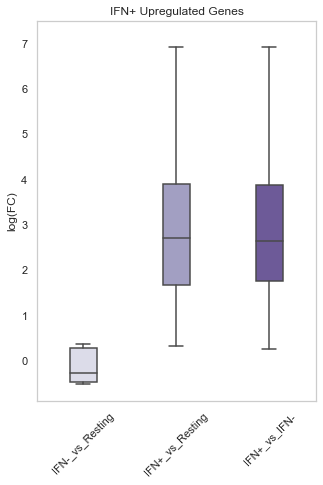

In [20]:
# Plot mouse results

# Set colors for each pair of compares states
my_pal = {"IFN-_vs_Resting":"#c2c2d6" , "IFN+_vs_Resting": "#99c2ff", "IFN+_vs_IFN-":"#cc99ff" } 

# Set style params
sns.set(rc={'figure.figsize':(5,7)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.boxplot(data = mouse_fcs, showfliers = False,palette="Purples",width = 0.3, ) # Plot mouse results 
ax.set(title="IFN+ Upregulated Genes",ylabel='log(FC)') # Set title and labels
ax.set(ylim=[-0.9, 7.5]) # set bars min and max
plt.setp(ax.get_xticklabels(), rotation=45) # set label's rotation

# Save figure
plt.savefig(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\mouse\blood\DE\cd16_mafb_de\mouse-pairs\ifn+_up_fcs_box.pdf",transparent = True, format="pdf")


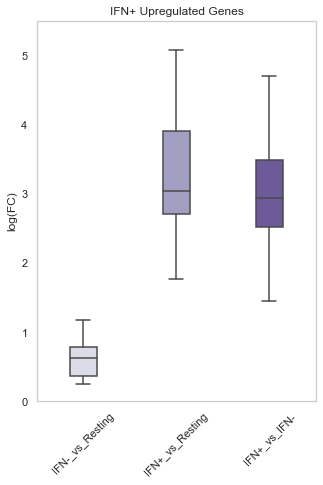

In [23]:
# Plot bat results

# Set colors for each pair of compares states
my_pal = {"IFN-_vs_Resting":"#c2c2d6" , "IFN+_vs_Resting": "#99c2ff", "IFN+_vs_IFN-":"#cc99ff" } 

# Set style params
sns.set(rc={'figure.figsize':(5,7)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.boxplot(data = bat_fcs, showfliers = False,palette="Purples",width = 0.3, ) # Plot bat results 
ax.set(title="IFN+ Upregulated Genes",ylabel='log(FC)') # Set title and labels
ax.set(ylim=[0, 5.5]) # set bars min and max
plt.setp(ax.get_xticklabels(), rotation=45) # set label's rotation


# Save figure
plt.savefig(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat1k_DE\cd16_mafb_de\bat_pairs\ifn+_up_fcs_box.pdf",transparent = True, format="pdf")
